# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.124942e+01     7.441108e+00
 * time: 0.0017180442810058594
     1     2.818897e+01     4.841648e+00
 * time: 0.006533145904541016
     2     1.948993e+01     5.199676e+00
 * time: 0.012562990188598633
     3     1.423070e+01     4.303933e+00
 * time: 0.01816105842590332
     4     1.088819e+01     1.437817e+00
 * time: 0.05419492721557617
     5     1.034587e+01     3.051100e+00
 * time: 0.05721592903137207
     6     9.710503e+00     1.407022e+00
 * time: 0.06039309501647949
     7     9.107478e+00     1.640671e+00
 * time: 0.06399106979370117
     8     8.681791e+00     1.434621e+00
 * time: 0.0677039623260498
     9     8.459783e+00     1.140278e+00
 * time: 0.07221412658691406
    10     8.331395e+00     1.077449e+00
 * time: 0.07731103897094727
    11     8.181310e+00     9.042114e-01
 * time: 0.08202004432678223
    12     8.057146e+00     4.218872e-01
 * time: 0.08684301376342773
    13     7.994509e+00     6.152576e-01
 * ti

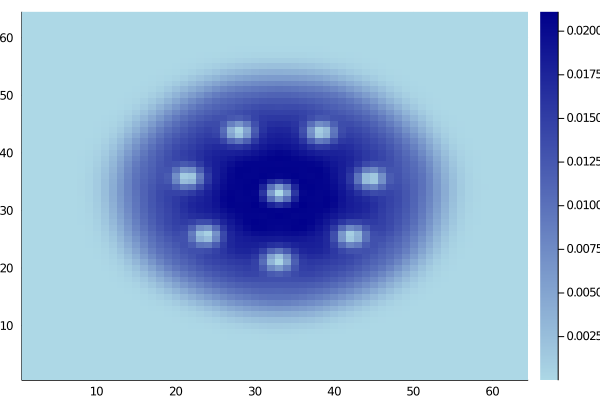

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)